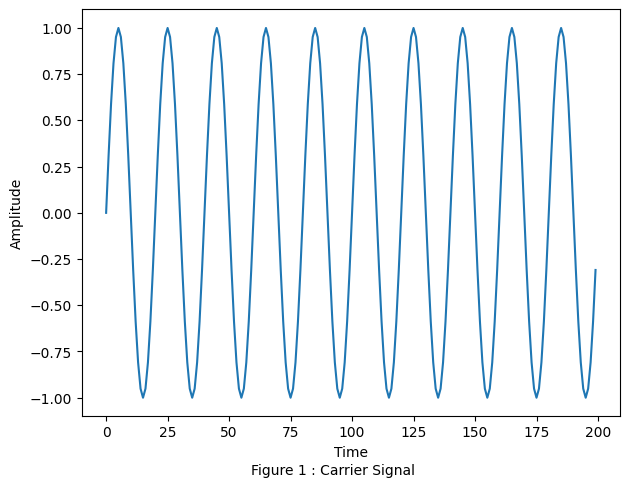

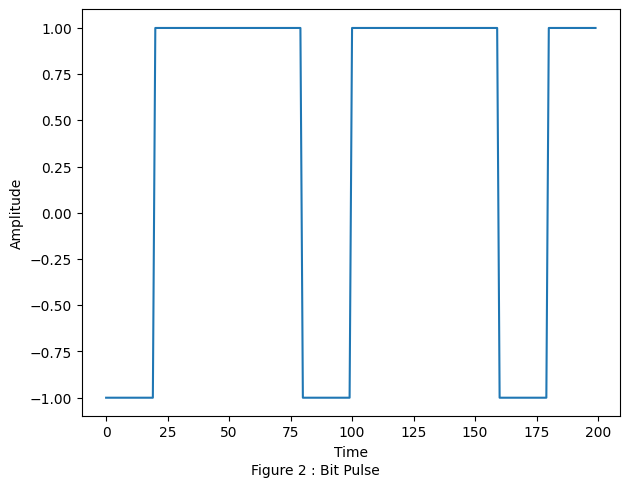

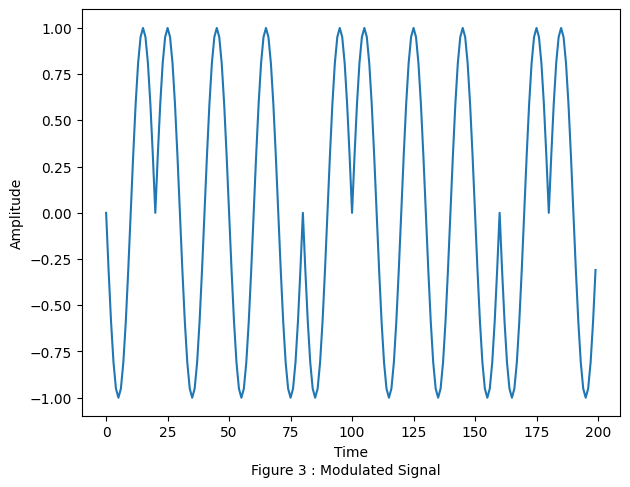

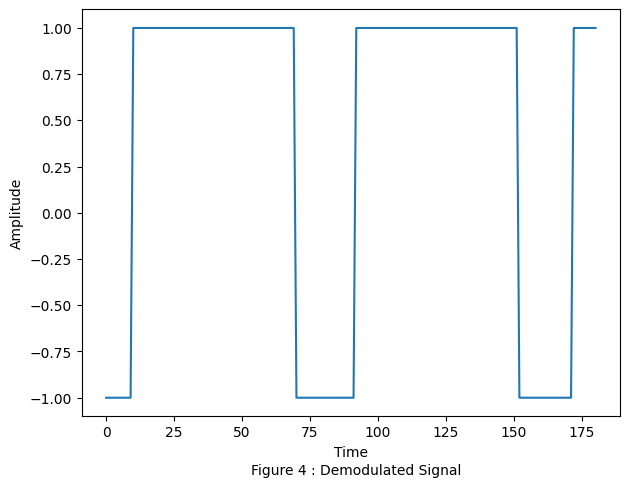

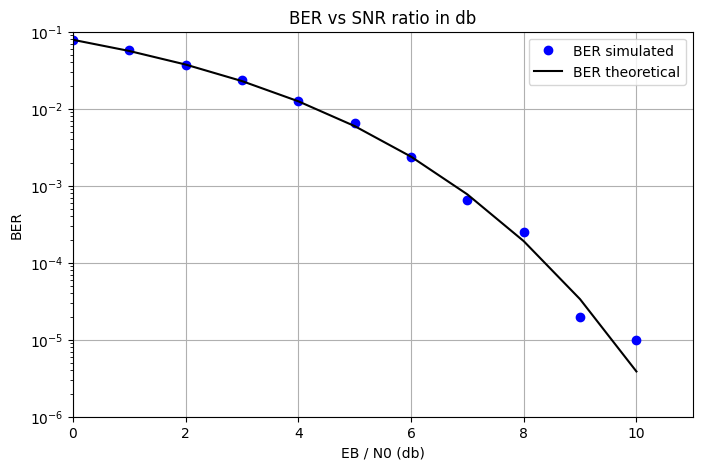

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import random

# Generate carrier signal
def generate_carrier_signal(freq, amp, num_samples, sampling_freq):
    t = np.arange(num_samples) / sampling_freq
    carrier_signal = amp * np.sin(2 * np.pi * freq * t)
    return carrier_signal

# Generate bit pulse
def generate_bit_pulse(num_bits, num_samples):
    pulse_width = num_samples // (1 * num_bits)
    bit_pulse = np.ones(num_samples)
    for i in range(num_bits):
        start_index = i * 4 * pulse_width
        bit_pulse[start_index:start_index + pulse_width] = -1
    return bit_pulse

# Multiply carrier signal with bit pulse
def generate_modulated_signal(carrier_signal, bit_pulse):
    return carrier_signal * bit_pulse

# BPSK demodulation
def bpsk_demodulation(modulated_signal, carrier_signal, sampling_freq, num_bits):
    # Multiply received signal by recovered carrier signal
    multiplied_signal = modulated_signal * carrier_signal
    
    # Integrate over one bit period
    bit_period = sampling_freq // freq
    integrated_signal = np.convolve(multiplied_signal, np.ones(bit_period), mode='valid')
    
    # Threshold detection
    threshold = 0
    demodulated_signal = np.where(integrated_signal > threshold, 1, -1)
    
    return demodulated_signal

# Function to add AWGN to the signal
def add_awgn(signal, snr_dB):
    snr_linear = 10 ** (snr_dB / 10)
    noise_power = 1 / snr_linear
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    return signal + noise


# Function to calculate Bit Error Rate (BER)
def calculate_ber(original_data, detected_data):
    return np.sum(original_data != detected_data) / len(original_data)

# Simulation parameters
num_bits = 10
freq = 50
amp = 1
sampling_freq = 1000
num_samples = num_bits * sampling_freq // freq

# Generate carrier signal
carrier_signal = generate_carrier_signal(freq, amp, num_samples, sampling_freq)

# Generate bit pulse
bit_pulse = generate_bit_pulse(num_bits, num_samples)

# Generate Modulated Signal
modulated_signal = generate_modulated_signal(carrier_signal, bit_pulse)

# BPSK demodulation
demodulated_signal = bpsk_demodulation(modulated_signal, carrier_signal, sampling_freq, num_bits)

# Plotting
plt.plot(np.arange(num_samples), carrier_signal)
plt.figtext(0.4,0.001,'Figure 1 : Carrier Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

plt.plot(np.arange(num_samples), bit_pulse)
plt.figtext(0.4,0.001,'Figure 2 : Bit Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

plt.plot(np.arange(num_samples), modulated_signal)
plt.figtext(0.4,0.001,'Figure 3 : Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

plt.plot(np.arange(len(demodulated_signal)), demodulated_signal)
plt.figtext(0.4,0.001,'Figure 4 : Demodulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Simulation parameters
# num_bits = 10000
# snr_range = np.arange(-4, 11, 2)
# theoretical_ber = 0.5 * np.exp(-10 ** (snr_range / 10))

# # Initialize arrays to store simulated BER
# simulated_ber = np.zeros_like(snr_range)

# for i, snr_dB in enumerate(snr_range):
#     data = generate_bit_pulse(num_bits, num_samples)
#     modulated_signal = generate_modulated_signal(num_bits, data)
#     received_signal = add_awgn(modulated_signal, snr_dB)
#     detected_data = bpsk_demodulation(received_signal,carrier_signal, sampling_freq, num_bits)
#     simulated_ber[i] = calculate_ber(data, detected_data)
# print(simulated_ber)

# # Plotting
# plt.semilogy(snr_range, theoretical_ber, label='Theoretical BER')
# plt.semilogy(snr_range, simulated_ber, marker='o', linestyle='-', color='r', label='Simulated BER')
# plt.xlabel('SNR (dB)')
# plt.ylabel('Bit Error Rate (BER)')
# plt.figtext(0.25,0.001,'Figure 5 : BPSK Modulation Performance Analysis')
# plt.legend()
# plt.grid(True)
# plt.show()

EbN0db = np.arange(0,11)
Nsym = 10 ** 5
BER_sim = np.zeros(len(EbN0db))
sym = [random.choice([1,0]) for i in range(Nsym)]
NRZop = [1 if sym[i] == 1 else -1 for i in range(Nsym)]
NRZ = np.array(NRZop)
for i, EbN0db1 in enumerate(EbN0db):
    gamma = 10 ** (EbN0db1 / 10)
    P = sum(abs(NRZ) ** 2) / len(NRZ)
    N0 = P / gamma
    n = np.sqrt(N0 / 2) * np.random.standard_normal(NRZ.shape)
    r = NRZ + n
    symDetect = np.zeros(len(r))
    for j in range(len(r)):
        if r[j] > 0:
            symDetect[j] = 1
        else:
            symDetect[j] = 0
    BER_sim[i] = np.sum(symDetect != sym) / Nsym
BER_theo = 0.5 * erfc( np.sqrt(10 ** (EbN0db / 10)))

plt.figure(figsize = (8 , 5))
plt.plot(EbN0db, BER_sim, 'bo', label = 'BER simulated')
plt.plot(EbN0db, BER_theo, 'k', label = 'BER theoretical')
plt.axis([0, 11, 1e-6 , 0.1])
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.ylabel('BER')
plt.xlabel('EB / N0 (db)')
plt.title('BER vs SNR ratio in db')
plt.grid(True)
plt.show()